In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split


In [96]:
data=pd.read_csv('CAR DETAILS.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [97]:
data.shape

(4340, 8)

In [98]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [99]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [100]:
data=data.drop(['owner','seller_type'],axis=1)
data

,name,year,selling_price,km_driven,fuel,transmission
0,Maruti 800 AC,2007,60000,70000,Petrol,Manual
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Manual
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Manual
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Manual
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Manual
...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Manual
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Manual
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Manual
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Manual


In [101]:
le=LabelEncoder()
data['name']=le.fit_transform(data['name'])
data['fuel']=le.fit_transform(data['fuel'])
data['transmission']=le.fit_transform(data['transmission'])
data

,name,year,selling_price,km_driven,fuel,transmission
0,775,2007,60000,70000,4,1
1,1041,2007,135000,50000,4,1
2,505,2012,600000,100000,1,1
3,118,2017,250000,46000,4,1
4,279,2014,450000,141000,1,1
...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1
4336,601,2014,409999,80000,1,1
4337,777,2009,110000,83000,4,1
4338,381,2016,865000,90000,1,1


In [102]:
x=data.drop('selling_price',axis=1)
y=data['selling_price']


In [103]:
x

,name,year,km_driven,fuel,transmission
0,775,2007,70000,4,1
1,1041,2007,50000,4,1
2,505,2012,100000,1,1
3,118,2017,46000,4,1
4,279,2014,141000,1,1
...,...,...,...,...,...
4335,602,2014,80000,1,1
4336,601,2014,80000,1,1
4337,777,2009,83000,4,1
4338,381,2016,90000,1,1


In [104]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [106]:
x_train.shape

(3255, 5)

In [107]:
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

In [108]:
model=Sequential()
model.add(Dense(200,input_dim=5,activation='relu',kernel_initializer='uniform'))
model.add(Dense(200,activation='relu',kernel_initializer='uniform'))
model.add(Dense(200,activation='relu',kernel_initializer='uniform'))
model.add(Dense(250,activation='relu',kernel_initializer='uniform'))
model.add(Dense(100,activation='relu',kernel_initializer='uniform'))
model.add(Dense(100,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='relu',kernel_initializer='uniform'))

C:\Users\mohammed shibil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
model.compile(loss='mean_squared_error',optimizer='Adam')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 200)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 250)            │        50,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,151 (652.93 KB)

 Trainable params: 167,151 (652.93 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
training_history=model.fit(x_train_scale,y_train,epochs=200,batch_size=100,validation_data=(x_test_scale,y_test))
training_history

Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 573569826816.0000 - val_loss: 670392188928.0000
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 600834703360.0000 - val_loss: 596940881920.0000
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 338789826560.0000 - val_loss: 223366479872.0000
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 168911552512.0000 - val_loss: 219218280448.0000
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 164011704320.0000 - val_loss: 211906625536.0000
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 155104673792.0000 - val_loss: 202734534656.0000
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 174364622848.0000 - val_loss: 199430995968.0000
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 124461252608.0000 - val_loss: 197303779328.0000
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 123930058752.0000 - val_loss: 195490234368.0000
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━

In [111]:
hist=training_history.history
hist.keys()

dict_keys(['loss', 'val_loss'])

In [112]:
hist['val_loss'][-1]

134944604160.0

Text(0, 0.5, 'loss')

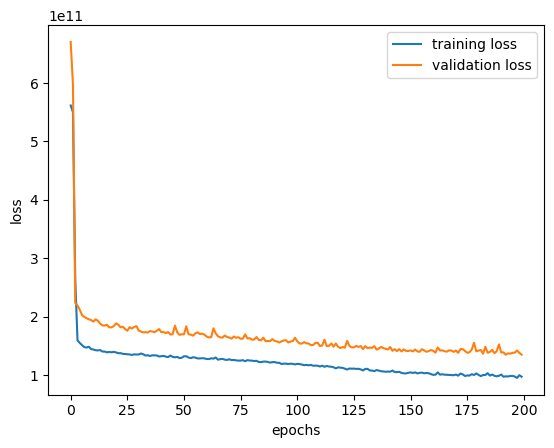

In [113]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

In [114]:
y_pred=model.predict(x_test_scale)
y_pred

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[ 464116.1 ],
       [ 872283.7 ],
       [ 319262.75],
       ...,
       [ 617736.25],
       [1277789.6 ],
       [ 251848.14]], dtype=float32)

In [163]:
int(model.predict(scale.transform([[775,2001,15000,4,1]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


C:\Users\mohammed shibil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\mohammed shibil\AppData\Local\Temp\ipykernel_11360\3414446271.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(model.predict(scale.transform([[775,2001,15000,4,1]])))


105131

## Dataset STUDENT PERFORMANCE

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [117]:
data1=pd.read_csv('Student_Performance.csv')
data1

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [118]:
data1.shape

(10000, 6)

In [119]:
data1.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [120]:
data1.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [133]:
le=LabelEncoder()
data1['Extracurricular Activities']=le.fit_transform(data1['Extracurricular Activities'])
data1

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [134]:
x=data1.drop('Performance Index',axis=1)
y=data1['Performance Index']

In [135]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [136]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [138]:
x_test.shape

(2500, 5)

In [139]:
x_test.shape

(2500, 5)

In [140]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [141]:
model1=Sequential()
model1.add(Dense(100,input_dim=5,activation='relu',kernel_initializer='uniform'))
model1.add(Dense(200,activation='relu',kernel_initializer='uniform'))
model1.add(Dense(200,activation='relu',kernel_initializer='uniform'))
model1.add(Dense(100,activation='relu',kernel_initializer='uniform'))
model1.add(Dense(100,activation='relu',kernel_initializer='uniform'))
model1.add(Dense(1,activation='relu',kernel_initializer='uniform'))

C:\Users\mohammed shibil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [142]:
model1.compile(loss='mean_squared_error',optimizer='Adam')
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,301 (356.64 KB)

 Trainable params: 91,301 (356.64 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
training_hist=model1.fit(x_train_scaled,y_train,epochs=80,batch_size=30,validation_data=(x_test_scaled,y_test))
training_hist

Epoch 1/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1344.5640 - val_loss: 13.4985
Epoch 2/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.6125 - val_loss: 6.8722
Epoch 3/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3040 - val_loss: 6.9469
Epoch 4/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2272 - val_loss: 4.6981
Epoch 5/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8153 - val_loss: 4.4975
Epoch 6/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6713 - val_loss: 4.5912
Epoch 7/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9317 - val_loss: 4.5592
Epoch 8/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8505 - val_loss: 4.3371
Epoch 9/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8673 - val_loss: 4.5464
Epoch 10/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2788 - val_loss: 5.2283
Epoch 11/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1683 - val_loss: 6.9302
Epoch 12/80
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

In [146]:
hist1=training_hist.history
hist1.keys()

dict_keys(['loss', 'val_loss'])

In [147]:
hist1['val_loss'][-1]

5.108975887298584

Text(0, 0.5, 'loss')

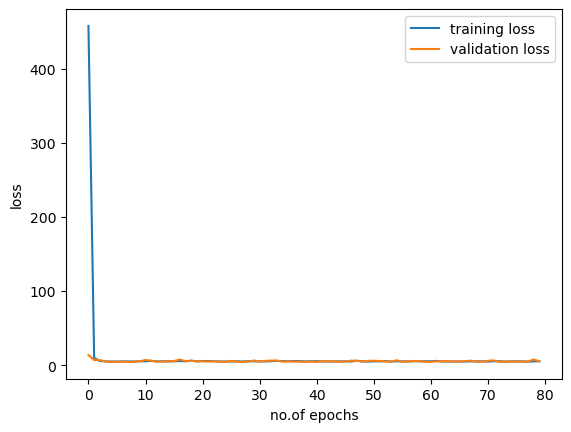

In [161]:
plt.plot(hist1['loss'],label='training loss')
plt.plot(hist1['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('loss')

In [148]:
y_pred=model1.predict(x_test_scaled)
y_pred

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[47.739525],
       [48.616875],
       [64.15441 ],
       ...,
       [32.964478],
       [38.221973],
       [72.933334]], dtype=float32)

In [160]:
model1.predict(scaler.transform([[7,99,1,9,10]]))

C:\Users\mohammed shibil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[92.584816]], dtype=float32)